
#### a equação da função de onda  completa:

$$i\hbar\frac{\partial\Psi}{\partial t}=\text{op }H\Psi$$

#### O opH é um operador de evolução temporal. Pode,ele, também assumir, a seguinte identidade matemática:
$$\text{op }U(\Delta t)=e^{\frac{-i\text{ op }H}{\hbar}}$$


#### Resultando, portanto, na solução, descrita abaixo:

$$\Psi(x,t+\Delta t)=e^{\frac{-i\text{ op }H\Delta t}{\hbar}}\cdot\Psi(x,t)$$

#### Podendo tratar o expoente de um operador, por meio de uma série infinita, tem-se:
$$e^{\frac{-i\text{ op }H\Delta t}{\hbar}}=\sum_{n}\frac{\Big(\frac{-i\text{ op }H\Delta t}{\hbar}\Big)^{n}}{n!}$$

In [1]:
#Bibliotecas

import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import scipy.fftpack as fft
import scipy.linalg as scl
import numpy as np
import math
%matplotlib inline



#### O Hamiltoniano no espaço:

$x_{n}=x_{0}+n\Delta x$, com $\Delta x =\frac{(x_{N}-x_{0})}{N}$

#### Os valores de entrada:


In [2]:
hbar = 1
m = 1
N = 2**11
L = 200.0
step_low = 0.
step_high= 1.
V0 = 10.

#### Definição do espaço:

In [3]:
n = np.arange(N)
x0 = -L/2.
xN = L/2.
Delta_x = (xN - x0)/N
print("Delta_x = ",Delta_x)

x = x0 + n*Delta_x

Delta_x =  0.09765625


#### Definição do potencial:

In [4]:
V = np.zeros(N)
for i in range(N):
    if x[i]>= step_low and x[i]<= step_high:
        V[i]= V0

#### Configuração do Hamiltoniano para a função `V`, multiplicação com a matriz inversa:

In [5]:
Mdd = 1./(Delta_x**2)*(np.diag(np.ones(N-1),-1)
                       - 2* np.diag(np.ones(N),0)
                       + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V)

En,psiT = np.linalg.eigh(H)   # autovalores e os autovetores.
psi = np.transpose(psiT)      # Tomamos a transposta de psiT para os vetores de função de onda
                              # que podem ser acessados como psi[n]

#### Intervalo temporal

In [6]:
dt_max = 2/np.max(En)      # Critério de estabilidade.
dt = 0.001
if dt > dt_max:
    print("ATENÇÃO: dt está na região instável!")

#### Função de onda inicial

In [7]:
g_x0=-10.
g_k0=6.
g_sig=2.

##### Definição de um Gaussiano no espaço K, com $p=\hbar k$, um momento $k_{0} $,                                     e o espaço x, $\psi(x,0)=\big(\frac{2L}{\pi}\big)^{1/4}\cdot e^{-Lx^{2}}$:



In [8]:
def psi0(x,g_x0,g_k0,g_sig):
    _Norm_x=np.sqrt(Delta_x/g_sig)/(np.pi**0.25)

    return(_Norm_x*np.exp(-(x-g_x0)**2/(2.*g_sig*g_sig)+1j*g_k0*x))

psi_t0 = psi0(x,g_x0,g_k0,g_sig)

In [9]:
# H é Hermitiano?
print("Verifique se H é realmente Hermitiano : ",np.array_equal(H.conj().T,H))

Verifique se H é realmente Hermitiano :  True


In [10]:
Ut_mat = np.diag(np.ones(N,dtype="complex128"),0)

print("Criação de uma matriz U(dt = {})".format(dt))
for n in range(1,3):
    # Realiza a soma. Como se trata de matrizes, o processo irá demorar se N for grande.
    Ut_mat += np.linalg.matrix_power((-1j*dt*H/hbar),n)/math.factorial(n)

Criação de uma matriz U(dt = 0.001)


In [11]:
p = Ut_mat.dot(psi_t0)

print("O quanto a normalização muda por etapa? Desde {} até {}".format(np.linalg.norm(psi_t0),np.linalg.norm(p)))
print("Nº de etapas em que a norma está errada por um fator 2 : ",1/(np.linalg.norm(p)-1))

O quanto a normalização muda por etapa? Desde 1.0 até 1.0000000127814086
Nº de etapas em que a norma está errada por um fator 2 :  78238637.96537858


#### teste do movimento gaussiano:

In [12]:
psi_t0 = psi0(x,g_x0,g_k0,g_sig)
psi_t1 = psi_t0
psi_tu = []

for t in range(3500):
    psi_t1 = Ut_mat.dot(psi_t1)
    if t>0 and t%500==0:
        psi_tu.append( (t,psi_t1))
psi_tu.append( (t,psi_t1))

#### Teste e verificação de coerência dos resultados:
##### $<E>$ = estado esperado da energia;
##### $<x>$ =  estado esperado da posição

In [13]:
print("Normalização : ",np.linalg.norm(psi_tu[-1][1]))

vev_E0=float(np.real(np.sum(np.conjugate(psi_t0)*H.dot(psi_t0))))
vev_x0=float(np.real(np.sum(np.conjugate(psi_t0)*x*psi_t0)))

print("<E_(t = 0)> = {:8.4f}  <x_(t = 0)> = {:8.4f}".format(vev_E0,vev_x0))

for t,p in psi_tu:
    norm = np.linalg.norm(p)
    vev_E1 = float(np.real(np.sum(np.conjugate(p)*H.dot(p))))
    vev_x1 = float(np.real(np.sum(np.conjugate(p)*x*p)))
    print("dt = {:7.1f}  norm = {:8.5f}  <E> = {:8.4f}  <x_(dt)> = {:8.4g}".format(t,norm,vev_E1,vev_x1))

Normalização :  1.0000447363612588
<E_(t = 0)> =  17.5429  <x_(t = 0)> = -10.0000
dt =   500.0  norm =  1.00001  <E> =  17.5432  <x_(dt)> =   -7.164
dt =  1000.0  norm =  1.00001  <E> =  17.5434  <x_(dt)> =   -4.335
dt =  1500.0  norm =  1.00002  <E> =  17.5436  <x_(dt)> =    -1.55
dt =  2000.0  norm =  1.00003  <E> =  17.5439  <x_(dt)> =   0.8044
dt =  2500.0  norm =  1.00003  <E> =  17.5441  <x_(dt)> =     2.91
dt =  3000.0  norm =  1.00004  <E> =  17.5443  <x_(dt)> =    5.103
dt =  3499.0  norm =  1.00004  <E> =  17.5446  <x_(dt)> =    7.305


#### Dos dados obtidos, resulta:

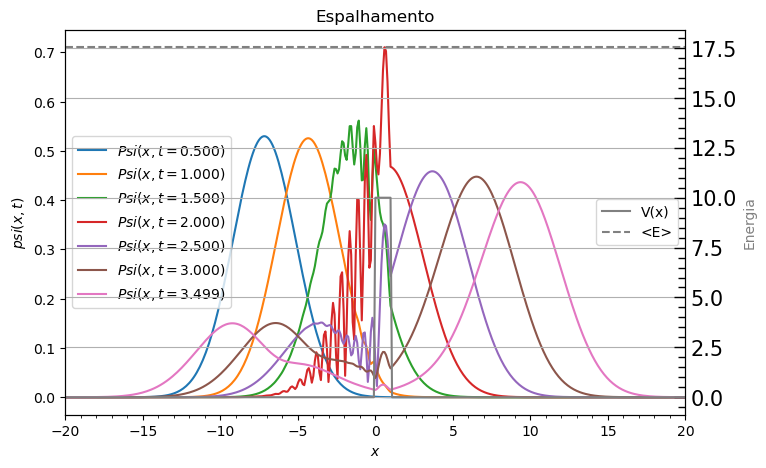

In [14]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)


plt.figure(figsize=(8,5))

if vev_E0>max(V):
    plt.title('Espalhamento')
else:
    plt.title('Tunelamento')
plt.ylabel('$psi(x,t)$')
plt.xlabel('$x$')
# plt.plot(x,np.abs(psi_t0)/np.sqrt(Delta_x),label="$\Psi(x,t=0)$")

for t,p in psi_tu:

    plt.plot(x,np.abs(p)/np.sqrt(Delta_x),label="$Psi(x,t={:6.3f})$".format(t*dt))
    plt.legend(loc = 'center left')

ax1 = plt.twinx()
plt.plot(x,V,color="grey",label="V(x)")
plt.plot([x[0],x[N-1]],[vev_E0,vev_E0],color="grey",linestyle="--",label="<E>")
plt.ylabel("Energia",color="grey")
plt.xlim(g_x0-5*g_sig,-g_x0+5*g_sig)
plt.legend(loc='best')
plt.grid()
opt_plot()

plt.show()